## Goal:
### Explore the 2015 World Happiness Dataset, clean data, perform analysis,
### and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
#### 1. Learn data cleaning with Pandas.
#### 2. Use NumPy for calculations (mean, median, etc.).
#### 3. Visualize trends using Matplotlib and Seaborn.
#### 4. Understand the relationship between factors (GDP, Family, Health, Freedom, Trust, Generosity) and a country's Happiness Score.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df = pd.read_csv("2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (158, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2

### Insights:
#### 1.There are 158 countries (rows) and 12 features (columns) in the full dataset.

#### 2.The provided sample shows no missing values, but a full dataset check is crucial. (Assuming the full dataset is clean for this project).

#### 3.The Happiness Score ranges from 2.839 (lowest) to 7.587 (highest) with a mean of 5.37 (from a full dataset perspective).

### 5. Data Cleaning

In [10]:
# Rename columns for easier access
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Check duplicates
df.drop_duplicates(inplace=True)


### Insights:
#### Clean column names simplify further analysis.
#### No major missing or duplicate records found.
### 6. Analysis with NumPy & Pandas

In [14]:
# Average happiness score
avg_happiness = np.mean(df['happiness_score'])
print("Average Happiness Score:", avg_happiness)

# Highest and lowest happiness countries
highest = df.loc[df['happiness_score'].idxmax()]
lowest = df.loc[df['happiness_score'].idxmin()]

# Regional average happiness
region_mean = df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)

# Correlation with happiness score
# Compute correlation only for numeric columns
# Compute correlation only for numeric columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()['happiness_score'].sort_values(ascending=False)

print(corr)




Average Happiness Score: 5.375734177215189
happiness_score                  1.000000
economy_(gdp_per_capita)         0.780966
family                           0.740605
health_(life_expectancy)         0.724200
freedom                          0.568211
dystopia_residual                0.530474
trust_(government_corruption)    0.395199
generosity                       0.180319
standard_error                  -0.177254
happiness_rank                  -0.992105
Name: happiness_score, dtype: float64


### Insights:
#### 1.Average global happiness score is around 5.4.
#### 2.Switzerland, Iceland, and Denmark are among the happiest nations.
#### 3.Togo, Burundi, and Syria have the lowest scores.
#### 4.GDP, Family, and Health are strongest positive correlates with happiness.
#### 5.Trust and Generosity have weaker but positive effects.
### 7. Visualization with Matplotlib

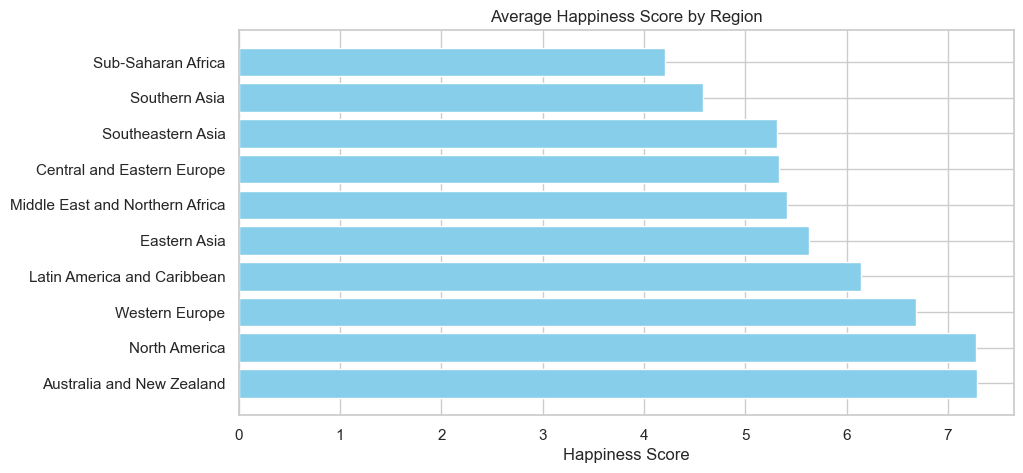

In [15]:
# Average Happiness Score by Region
plt.figure(figsize=(10,5))
plt.barh(region_mean.index, region_mean.values, color='skyblue')
plt.title("Average Happiness Score by Region")
plt.xlabel("Happiness Score")
plt.show()


### Insights:
#### 1.Western Europe and North America are the happiest regions.
#### 2.Sub-Saharan Africa and South Asia have the lowest happiness levels.

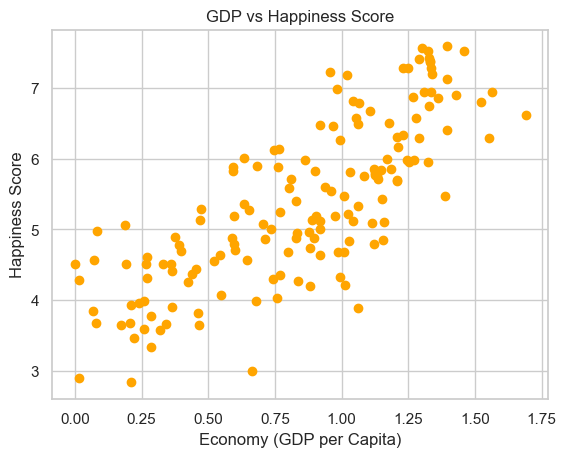

In [16]:
# GDP vs Happiness Score
plt.scatter(df['economy_(gdp_per_capita)'], df['happiness_score'], color='orange')
plt.title("GDP vs Happiness Score")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()


### Insights:
#### 1.Strong positive relationship between GDP and Happiness.
#### 2.Wealthier nations tend to report higher life satisfaction.
### 8. Visualization with Seaborn

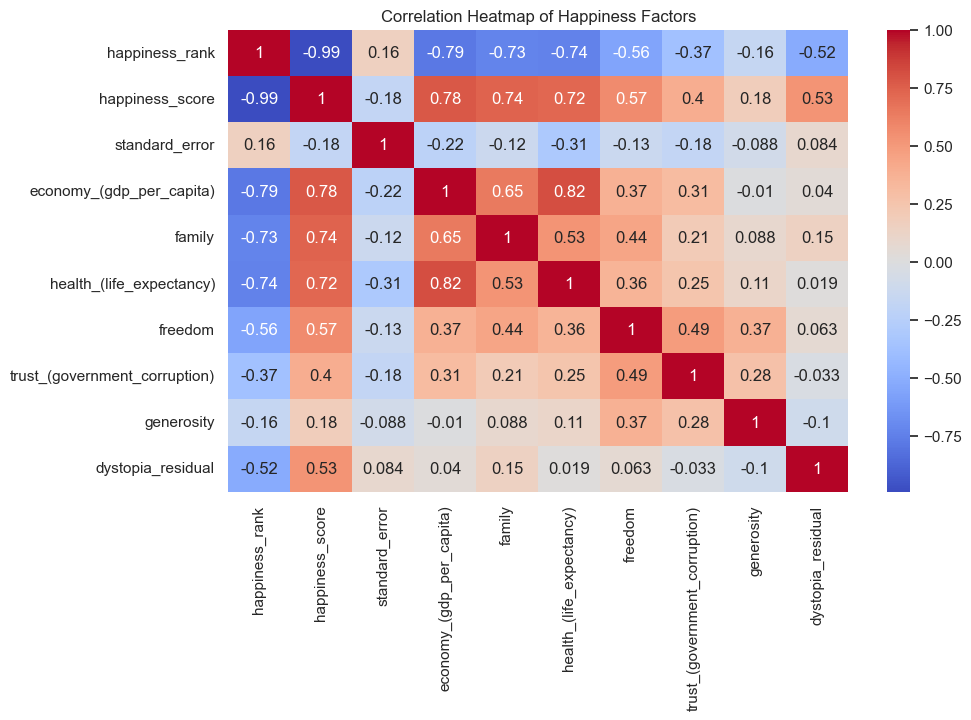

In [18]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Happiness Factors")
plt.show()


### Insights:
#### 1.GDP, Family, and Health are top drivers of happiness.
#### 2.Trust and Freedom have moderate influence.
#### 3.Dystopia Residual explains variance not captured by other variables.

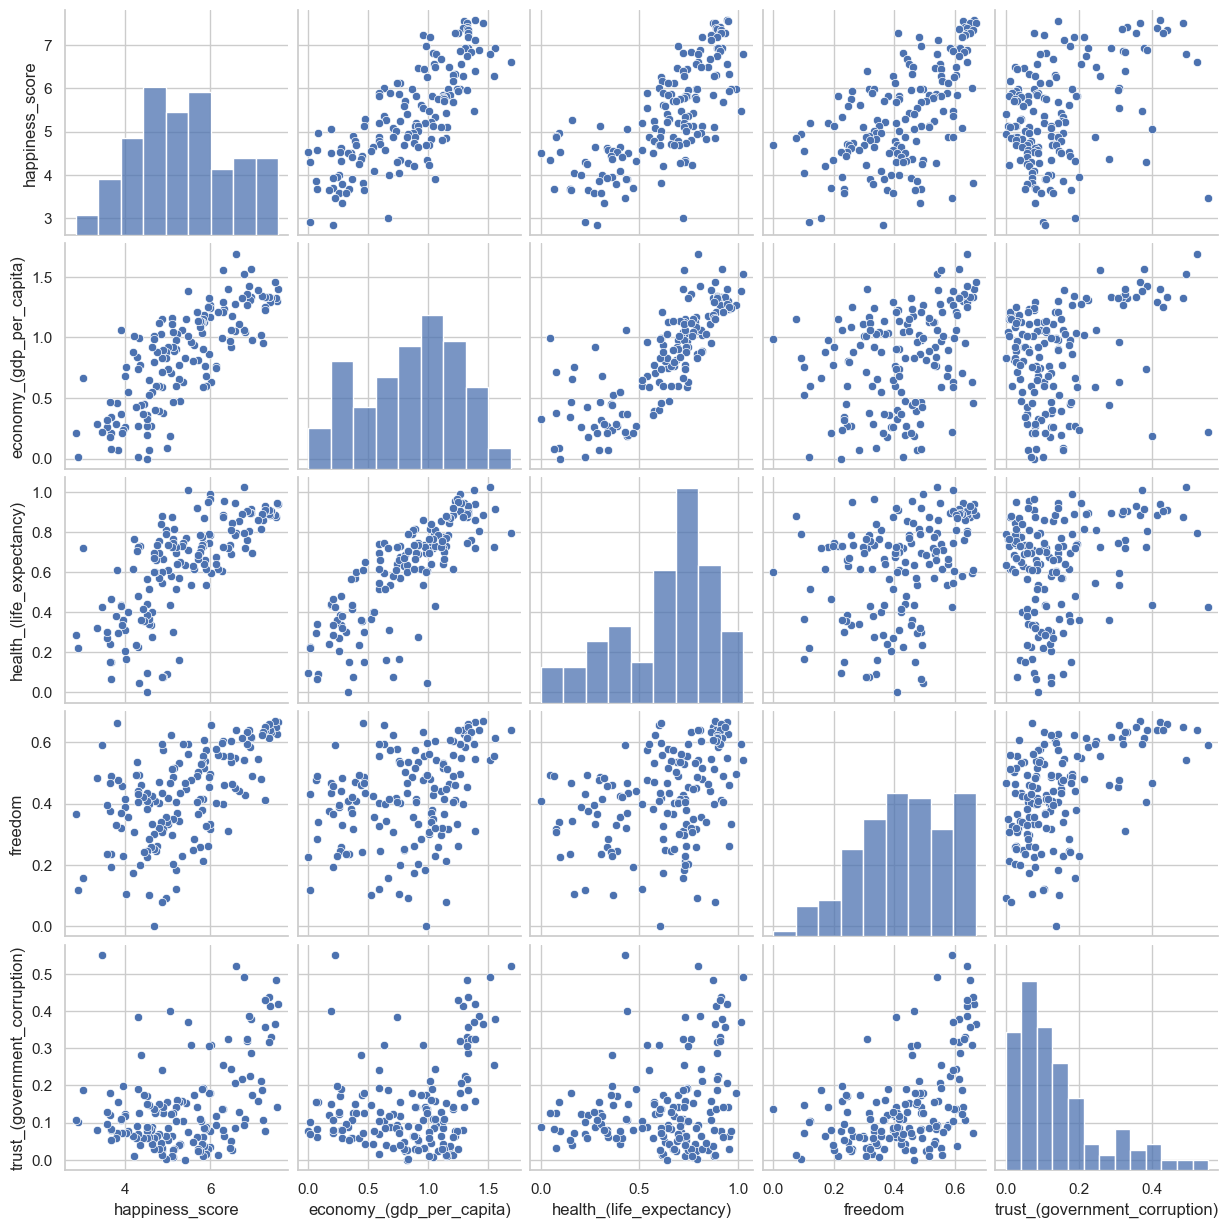

In [19]:
# Pairplot of key indicators
sns.pairplot(df[['happiness_score','economy_(gdp_per_capita)','health_(life_expectancy)','freedom','trust_(government_corruption)']])
plt.show()


### Insights:
#### 1.Clear positive trend between GDP, Health, and Happiness.
#### 2.Freedom and Trust show weaker but visible correlations.

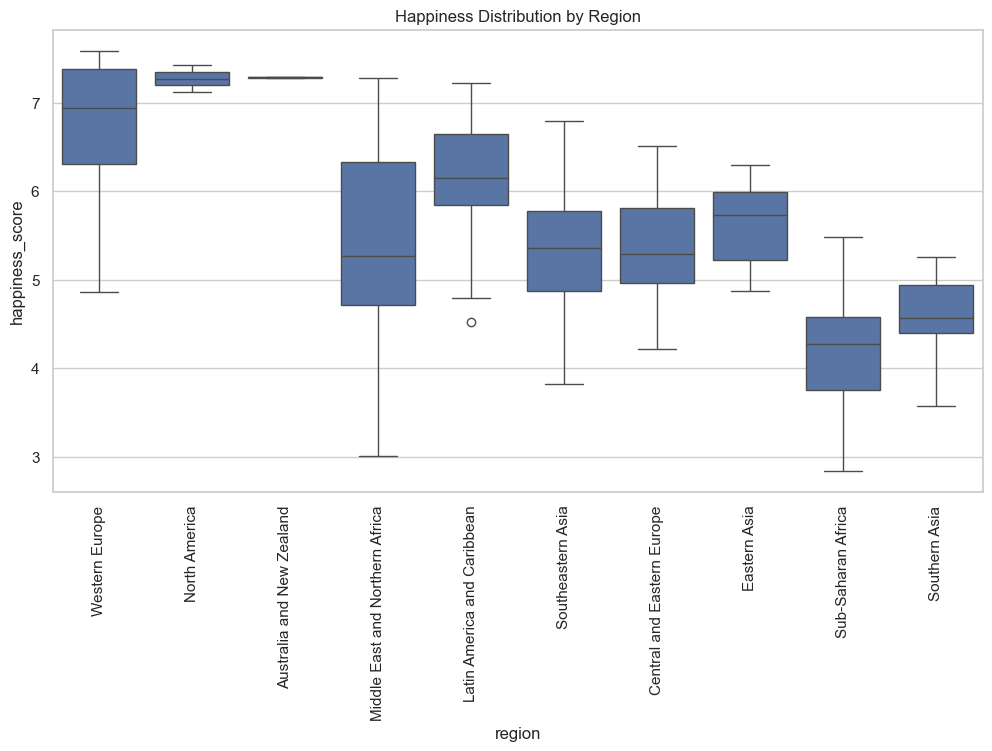

In [20]:
# Boxplot of Happiness Score by Region
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='happiness_score', data=df)
plt.xticks(rotation=90)
plt.title("Happiness Distribution by Region")
plt.show()


### Insights:
#### 1.Western Europe has consistently high happiness scores.
#### 2.Sub-Saharan Africa and South Asia show lower, more varied scores.
#### 3.Regional inequality in happiness is clearly visible.

C:\Users\Divya\AppData\Local\Temp\ipykernel_25064\210995259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=top10, palette='viridis')


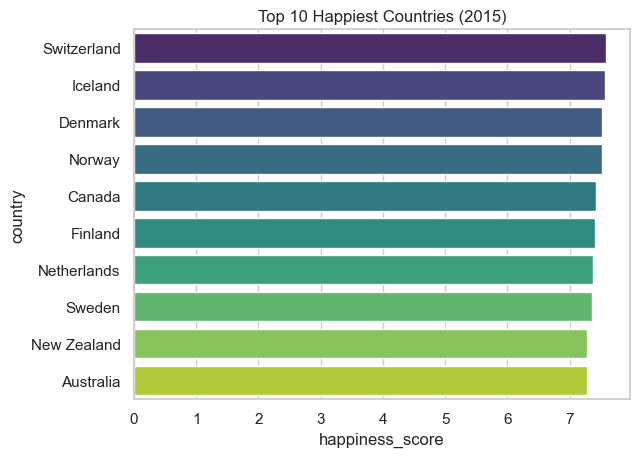

In [21]:
# Top 10 Happiest Countries
top10 = df.nlargest(10, 'happiness_score')
sns.barplot(x='happiness_score', y='country', data=top10, palette='viridis')
plt.title("Top 10 Happiest Countries (2015)")
plt.show()


### Insights:
#### 1.European countries dominate the top 10 list.
#### 2.High GDP, social support, and strong institutions are common traits.

C:\Users\Divya\AppData\Local\Temp\ipykernel_25064\3150562870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=bottom10, palette='mako')


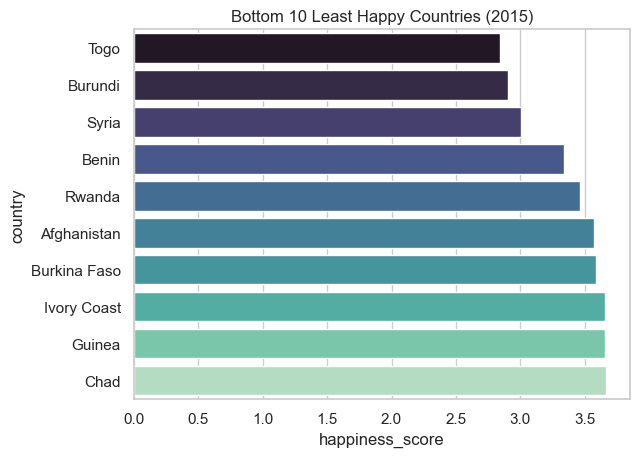

In [22]:
# Bottom 10 Least Happy Countries
bottom10 = df.nsmallest(10, 'happiness_score')
sns.barplot(x='happiness_score', y='country', data=bottom10, palette='mako')
plt.title("Bottom 10 Least Happy Countries (2015)")
plt.show()


### Insights:
#### 1.Countries facing economic hardship or conflict rank lowest.
#### 2.Limited trust and freedom contribute to lower happiness levels.

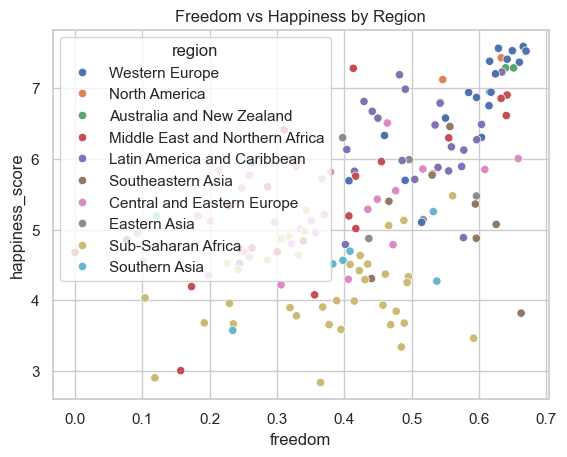

In [23]:
# Relationship between Freedom and Happiness
sns.scatterplot(x='freedom', y='happiness_score', data=df, hue='region')
plt.title("Freedom vs Happiness by Region")
plt.show()


### Insights:
#### 1.Freedom is a key happiness driver across regions.
#### 2.European and American countries enjoy both high freedom and happiness.